# (Quick) Python introduction and horizon mask effect

<table>
  <tr>
    <td><img src="https://raw.githubusercontent.com/AlexandreHugoMathieu/pvfault_detection_solar_academy/refs/heads/master/notebooks/logos/CSTB_logo.jpg" width="200" />
    <td><img src="https://raw.githubusercontent.com/AlexandreHugoMathieu/pvfault_detection_solar_academy/refs/heads/master/notebooks/logos/Heliocity_logo.png" width="200" /> 
    <td><img src="https://raw.githubusercontent.com/AlexandreHugoMathieu/pvfault_detection_solar_academy/refs/heads/master/notebooks/logos/USMB_logo_horizontal.png" width="200" />
  </tr>
</table>

<sub>Author: Alexandre MATHIEU, Phd Student, in collaboration Heliocity / CSTB / USMB (LOCIE). </sub>
<sub>Phd thesis: Methodology development to guarantee building photovoltaic systems' performance including failure modelling</sub>

This notebook introduces how to use python to explore data and calculate the effect of shading with the horizon mask from PVGIS.

It is broken down into two parts:

1. **Python introduction**: The student will follow the python introduction and is invited to execute the cells.
2. **Horizon mask effect**: The student is invited to apply the effect of shading on the horizon mask.

The attendees are very much welcome to modify and create/execute some new notebook cells to explore data and try out new methods.

**Make sure to manually execute the cells (ctrl + enter) yourself one by one**

The students are expected to do the **exercices**.

## I. Python introduction

In this introduction, 4 topics will be tackled:

1. Filtering over a pandas Series or DataFrame
2. Use "If" and Loops commands
3. Make plots
4. Create python functions

In [1]:
import numpy as np # For math operations
import pandas as pd # To create indexed-timeseries
import matplotlib.pyplot as plt # To plot figures

# Load satellite CAMs irradiance data from an online file
urlw="https://raw.githubusercontent.com/AlexandreHugoMathieu/pvfault_detection_solar_academy/refs/heads/master/data/sat_data.csv"
weather_data = pd.read_csv(urlw, index_col=0)
weather_data.index = pd.to_datetime(weather_data.index).tz_convert("Europe/Paris")  # Convert the index to a datetime index and assign it to local time

print(weather_data.dropna().head(20))  # Show the first 5 lines, (all in W/m2)

                                ghi      dhi       dni
2022-01-01 01:00:00+01:00    0.0000   0.0000    0.0000
2022-01-01 02:00:00+01:00    0.0000   0.0000    0.0000
2022-01-01 03:00:00+01:00    0.0000   0.0000    0.0000
2022-01-01 04:00:00+01:00    0.0000   0.0000    0.0000
2022-01-01 05:00:00+01:00    0.0000   0.0000    0.0000
2022-01-01 06:00:00+01:00    0.0000   0.0000    0.0000
2022-01-01 07:00:00+01:00    0.0000   0.0000    0.0000
2022-01-01 08:00:00+01:00    0.6882   0.6074    1.1661
2022-01-01 09:00:00+01:00   59.1956  25.4935  337.4030
2022-01-01 10:00:00+01:00  150.5869  61.0075  471.0327
2022-01-01 11:00:00+01:00  248.1986  63.4317  677.5654
2022-01-01 12:00:00+01:00  281.0088  84.9074  633.1003
2022-01-01 13:00:00+01:00  288.8650  67.8544  723.7922
2022-01-01 14:00:00+01:00  225.3259  70.7458  596.6607
2022-01-01 15:00:00+01:00  147.1628  48.1738  544.8499
2022-01-01 16:00:00+01:00   39.9784  20.9257  214.4652
2022-01-01 17:00:00+01:00    0.0000   0.0000    0.0000
2022-01-01

In [2]:
# Load satellite position data calculated from NREL algorithm: I. Reda and A. Andreas, Solar position algorithm for solar radiation applications. Solar Energy, vol. 76, no. 5, pp. 577-589, 2004.
# Stored in an online file
urls= "https://raw.githubusercontent.com/AlexandreHugoMathieu/pvfault_detection_solar_academy/refs/heads/master/data/solarpos_data.csv"
solar_position = pd.read_csv(urls, index_col=0)
solar_position.index = pd.to_datetime(solar_position.index).tz_convert("Europe/Paris")  # Convert the index to a datetime index and assign it to local time

print(solar_position.dropna().head(5))  # Show the first 5 lines, (all in ° degree)

                               zenith     azimuth
2022-01-01 01:00:00+01:00  153.182717  317.064974
2022-01-01 02:00:00+01:00  153.182717   17.989233
2022-01-01 03:00:00+01:00  148.059897   44.354858
2022-01-01 04:00:00+01:00  140.071691   63.762450
2022-01-01 05:00:00+01:00  130.744429   78.384802


### I.1 Pandas Filtering

When it comes to make calculations faster or select a specific chunk of the DataFrame, filtering can be usefull

                                ghi       dhi       dni
2022-01-01 10:00:00+01:00  150.5869   61.0075  471.0327
2022-01-01 11:00:00+01:00  248.1986   63.4317  677.5654
2022-01-01 12:00:00+01:00  281.0088   84.9074  633.1003
2022-01-01 13:00:00+01:00  288.8650   67.8544  723.7922
2022-01-01 14:00:00+01:00  225.3259   70.7458  596.6607
...                             ...       ...       ...
2022-12-29 15:00:00+01:00  121.7313   64.2177  327.8066
2022-12-30 13:00:00+01:00  112.1809  109.6016    8.7161
2022-12-31 12:00:00+01:00  217.0507  150.5710  216.7422
2022-12-31 13:00:00+01:00  193.7134  161.4488  106.0832
2022-12-31 14:00:00+01:00  148.3794  138.0295   39.0728

[3190 rows x 3 columns]


<AxesSubplot:>

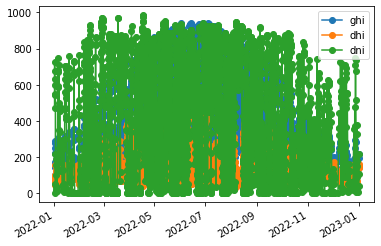

In [3]:
# Filter the dataframe when ghi is over a threshold
filter = weather_data["ghi"] > 100

print(weather_data.loc[filter])

# Plot it
weather_data.loc[filter].plot(marker="o")# Add markers

<AxesSubplot:>

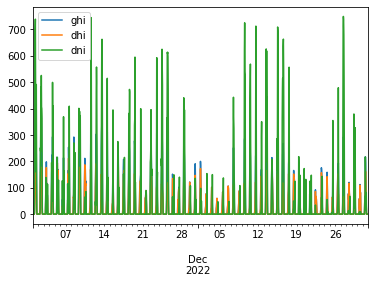

In [4]:
# Sometimes we don't see much about the data and it can be interesting to filter on some dates
filter_date = weather_data.index > pd.to_datetime("2022-11-01").tz_localize("CET") # Filter after the 1st of November
weather_data.loc[filter_date].plot()

<AxesSubplot:>

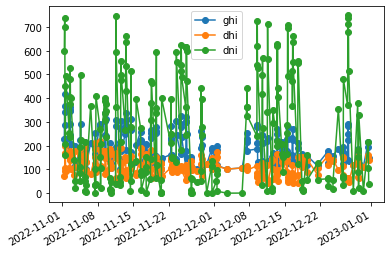

In [5]:
# The filters can add up
filter_all = filter | filter_date # or
filter_all2 = filter & filter_date # and
weather_data.loc[filter_all2].plot(marker="o")

In [6]:
# Note that only one column can also be selected according to a filter with the loc command
print(weather_data.loc[filter_all2, "ghi"].head(5))

2022-11-01 09:00:00+01:00    226.2636
2022-11-01 10:00:00+01:00    343.7006
2022-11-01 11:00:00+01:00    418.7252
2022-11-01 12:00:00+01:00    365.9074
2022-11-01 13:00:00+01:00    288.3209
Name: ghi, dtype: float64


#### Exercice

Apply the following filters on weather_data with the condition "or":

- ghi > 800 W/m2
- between the 1st of July and the 1st of August

And plot dhi only

<AxesSubplot:>

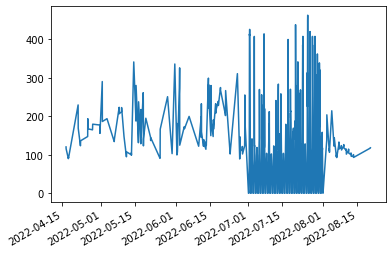

In [7]:
filter_1 = weather_data["ghi"] > 800

filter_date1 = (weather_data.index > pd.to_datetime("20220701").tz_localize("CET"))
filter_date2 = (weather_data.index < pd.to_datetime("20220801").tz_localize("CET"))
filter_2 = filter_date1 & filter_date2

filter = filter_1 | filter_2
weather_data.loc[filter, "dhi"].plot()

## I.2. "If" and loops

"If" allows to verify and execute actions with an assertion.

On the other hand, loops enable to loop over all elements of a list or DataFrame for instance, to performance action on it.

In [8]:
# "If" allows to execute the next row (with a tabulation to the right) if the assertion is True
a=1
if a<0: # assertion: is "a" under 0 ?
    print("a is lower than 0") # Line non executed since the assertion above is wrong

In [9]:
if a>0:
    print("a is greater than 0") # Line  executed since the assertion above is right

a is greater than 0


In [10]:
# Sometimes operations can not be applied directly with pd.Series and loops allow to go through each element of a list or serie
my_list = ["element 1","element 2"]
for element in my_list:
    print(element)

element 1
element 2


In [11]:
# It can be applied to pd.Series
ts = pd.Series([1,2,3])
for element in ts:
    print(element**2)

1
4
9


In [12]:
# For dataFrame, one can use the "iterrows" method
df = pd.DataFrame()
df["column1"] = [1,2,3]
df["column2"] = [1, 3, 5]
print(df)

   column1  column2
0        1        1
1        2        3
2        3        5


In [13]:
ts_stock = pd.Series(dtype=float) # Prepare the recipient to store the values

for index, row in df.iterrows(): # Loop over all rows of the dataframe one by one
    print(row["column1"] + row["column2"])
    ts_stock.loc[index] = row["column1"] + row["column2"]

2
5
8


In [14]:
print(ts_stock)

0    2
1    5
2    8
dtype: int64


#### Exercice

Create a new pd.Serie timeserie from df which have the same indexes and has a 1 in its row value if the sum over the df row is greater than 4, otherwise, assign 0

In [15]:
df = pd.DataFrame()
df["column1"] = [1,2,3]
df["column2"] = [1, 3, 5]

ts_stock = pd.Series(dtype=float) # Complete here

for index, row in df.iterrows(): # Loop over all rows of the dataframe one by one
    if row["column1"] + row["column2"] > 4:
        ts_stock.loc[index] = 1
    if row["column1"] + row["column2"] < 4:
        ts_stock.loc[index] = 0

print(ts_stock)

0    0
1    1
2    1
dtype: int64


### I.3. Plots

Text(0.5, 1.0, 'My title')

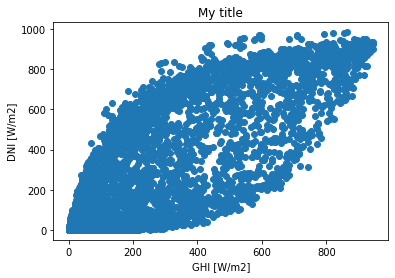

In [16]:
# Here is an example about how to make a plot with the matplotlib.pyplot library
plt.plot(weather_data["ghi"], weather_data["dni"], linewidth=0, marker="o")

plt.xlabel('GHI [W/m2]')
plt.ylabel('DNI [W/m2]')
plt.title("My title")

### I.4. Functions

Functions enable package small algorithms which are easy to apply and to re-use

In [17]:
# Define the function "" with the "def" command and a small increment tab to the right
def cos_aoi_function(beta, azimuth, sun_elevation, sun_azimuth):
    cos_aoi = np.cos(beta* np.pi/180)*np.sin(sun_elevation*np.pi/180) +np.sin(beta*np.pi/180)*np.cos(sun_elevation*np.pi/180)*np.cos((azimuth-sun_azimuth)*np.pi/180)
    return cos_aoi

# Installation orientation
beta = 20 # tilt [°]
azimuth = 180 # azimuth [°]
sun_elevation = 72 # sun elevation [°]
s_azimuth = 173.9 # sun azimuth [°]

cos_aoi = cos_aoi_function(beta, azimuth, sun_elevation, s_azimuth)
print(cos_aoi)

0.9987924041267017


#### Exercice

Apply the function cos_aoi_function() on the pd.DataFrame "solar_position"


In [18]:
beta = 20 # tilt [°]
azimuth = 180 # azimuth [°]

solar_position["elevation"] = 90-solar_position["zenith"]
cos_aoi = cos_aoi_function(beta, azimuth, solar_position["elevation"], solar_position["azimuth"])
print(cos_aoi.head())

2022-01-01 00:00:00+01:00         NaN
2022-01-01 01:00:00+01:00   -0.951597
2022-01-01 02:00:00+01:00   -0.985387
2022-01-01 03:00:00+01:00   -0.926801
2022-01-01 04:00:00+01:00   -0.817649
dtype: float64


## II Mask Horizon effect

<span style="color: red"> Add the horizon file from PVGIS in the "data" folder by browsing on the left pan and indicate the filename below </span>

In [19]:
# Indicate the csv-file path
file =  "https://raw.githubusercontent.com/AlexandreHugoMathieu/pvfault_detection_solar_academy/refs/heads/master/data/horizon_45.181_5.714.csv" # for instance: "content/horizon_45.181_5.714.csv"

In [20]:
# Import the file into a pandas DataFrame  (skip some rows and add some arguments to make the dataframe clean))
data = pd.read_csv(file, sep='\t', skiprows=3, skipfooter=8, engine="python").dropna(axis=1)

# The following lines do some operations
data = data[["A", "H_hor"]] # Keep only the two relevant columns 'A' azimuth and "H_hor": Horizon line
data.columns = ["azimuth", "elevation"] # Rename the columns
data["azimuth"] = data["azimuth"] + 180 # Change the convention (to have the convention with 0° is North, 90° East etc...)

# Transform the dataframe into a pd.Series which has azimuth as index and elevation as values
data_ts = data.set_index("azimuth")["elevation"] 
# Reindex it from 0 to 360 to make it easier to manipulate with an elevation associated for any single azimuth 
# (some missing values are appearing since the initial file does gives a mask elevation value azimuths space by 7.5 units)
data_ts = data_ts.reindex(np.arange(0,360))

# Interpolate to make sure there are values for any single azimuth
data_ts=data_ts.interpolate()

# Print the 20 first lines
print(data_ts.head(20))  # pd.Series

azimuth
0     7.600000
1     7.600000
2     7.600000
3     7.600000
4     7.600000
5     7.600000
6     7.600000
7     7.600000
8     7.600000
9     7.600000
10    7.600000
11    7.600000
12    7.600000
13    7.600000
14    7.600000
15    7.600000
16    7.653333
17    7.706667
18    7.760000
19    7.813333
Name: elevation, dtype: float64


#### Exercice 

a. Plot the elevation as function of the azimuth with matplotlib

<AxesSubplot:xlabel='azimuth'>

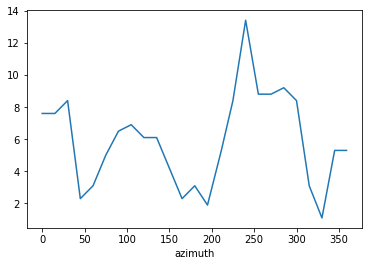

In [21]:
data_ts.plot()
# also works: plt.plot(data_ts.index, data_ts.values)

b. Apply the shading effect on the direct POA component, ie if the sun elevation is under the horizon line, POAb = 0 W/m2

Advice: You might want to create a loop over the dataframe which contains the POA data and calculate the shading elevation for each of its time step in a new column

In [22]:
# Installation orientation
beta = 20 # tilt [°]
azimuth = 180 # azimuth [°]
rho = 0.2 # albedo

<AxesSubplot:>

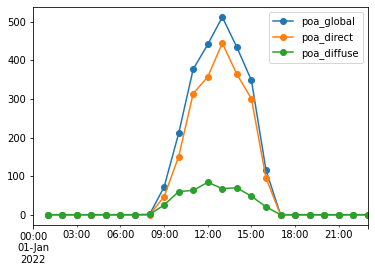

In [23]:
# Calculate poa components with the lazy way thanks to the pvlib package
from pvlib.irradiance import get_total_irradiance

# Notice it takes degrees as inputs
poa_data = get_total_irradiance(beta, azimuth, solar_position["zenith"], solar_position["azimuth"], weather_data["dni"], 
                                weather_data["ghi"], weather_data["dhi"], albedo=rho)

# Plot the first day
poa_data.loc[:, ["poa_global", "poa_direct", "poa_diffuse"]].head(24).plot(marker="o")

In [24]:
# Create a copy of poa_data to inject shading
poa_data_wshading = poa_data.copy()

# Inject the elevation column from "solar_position" to "poa_data_wshading" to make it easier to manipulate
poa_data_wshading["sun_elevation"] =  90 - solar_position["zenith"] 
poa_data_wshading["azimuth"] =   solar_position["azimuth"] 

# prepare a column with no values to include the elevation of the shading mask
poa_data_wshading["elevation_shading"] = np.nan 
    
# Loop over each row to check what is the azimuth and asign the mask elevation value according to the azimuth with "data_ts"
for idx, row in poa_data_wshading.iterrows():    
    
    # Round off the azimuth to be able to extract the values with the index from "data_ts" which have no decimals
    azimuth_int = round(poa_data_wshading.loc[idx, "azimuth"]) 
    
    poa_data_wshading.loc[idx, "elevation_shading"] = data_ts.loc[azimuth_int]
    
poa_data_wshading.head()

,poa_global,poa_direct,poa_diffuse,poa_sky_diffuse,poa_ground_diffuse,sun_elevation,azimuth,elevation_shading
2022-01-01 00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,317.064974,2.833333
2022-01-01 01:00:00+01:00,0.0,-0.0,0.0,0.0,0.0,-63.182717,317.064974,2.833333
2022-01-01 02:00:00+01:00,0.0,-0.0,0.0,0.0,0.0,-63.182717,17.989233,7.760000
2022-01-01 03:00:00+01:00,0.0,-0.0,0.0,0.0,0.0,-58.059897,44.354858,2.706667
2022-01-01 04:00:00+01:00,0.0,-0.0,0.0,0.0,0.0,-50.071691,63.762450,3.606667


<AxesSubplot:>

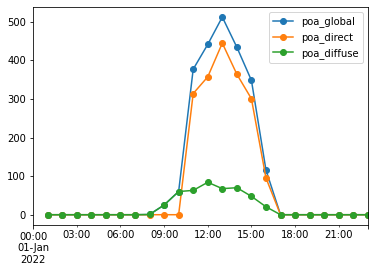

In [25]:
# Create a filter to know when shading occurs (when the sun is under the shading elevation)
filter_shading = poa_data_wshading["elevation_shading"] > poa_data_wshading["sun_elevation"]

# Apply shading and block the direct component
poa_data_wshading.loc[filter_shading, "poa_direct"] = 0

# Recalculate the global component with the shading effect on the direct component
poa_data_wshading["poa_global"] = poa_data_wshading["poa_direct"] + poa_data_wshading["poa_diffuse"]

# Plot the first day
poa_data_wshading.loc[:, ["poa_global", "poa_direct", "poa_diffuse"]].head(24).plot(marker="o")